<a href="https://colab.research.google.com/github/amsheveleva/T1_T2_relaxation_time/blob/main/T1_Tm_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context
Relaxation times are imoprtant paraments physcics. The following script should help plot the T1 and Tm relaxation times measured in EPR spectroscopy experiment by inversion recovery and spin echo experiment and derived and saved in Excel tables by fitting using Matlab scripts.

**Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**T1_VO_Zr**

In [ ]:
datat1Zr = pd.read_excel('/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_VO_Zr.xlsx')

**View the first and last 5 rows of the dataset**

In [ ]:
datat1Zr.head()

,OriginalVariableNames,Temp_K,Field_mT,T1mono_ns,std1,RsqMono,T1str_ns,stdstr,Streach,Std_Streach,RsqStreach,T1bi1_ns,stdBi1,T1bi2_ns,stdBi2,RsqBi
0,parameters,70,1205.700,13475.065,49.086,0.993,10762.371,28.388,0.766,0.002,0.999,22136.591,148.028,6906.855,59.524,0.999
1,parameters_1,70,1229.600,12245.213,46.162,0.993,9801.609,33.911,0.769,0.002,0.999,20014.146,76.488,6266.457,187.239,0.999
2,parameters_2,70,1254.000,11940.107,50.725,0.991,9529.836,50.574,0.766,0.003,0.997,19522.543,116.280,6048.938,284.314,0.997
3,parameters_3,70,1288.500,15962.110,198.850,0.928,12006.556,322.737,0.724,0.014,0.936,27456.823,1721.888,7607.457,616.184,0.936
4,parameters_4,70,1189.700,17827.425,79.531,0.990,13867.205,73.186,0.746,0.003,0.997,29170.273,379.691,8507.127,155.396,0.997


In [ ]:
datat1Zr=datat1Zr.drop('OriginalVariableNames', axis=1)


In [ ]:
datat1Zr=datat1Zr.sort_values(by='Temp_K')
datat1Zr


,Temp_K,Field_mT,T1mono_ns,std1,RsqMono,T1str_ns,stdstr,Streach,Std_Streach,RsqStreach,T1bi1_ns,stdBi1,T1bi2_ns,stdBi2,RsqBi
10,5,1189.700,16781101.330,72758.872,0.986,22856304.979,90871.519,0.523,0.001,0.999,25818215.035,67287.140,2227475.245,16664.579,0.999
17,5,1229.600,4122246.836,24620.649,0.958,2867983.133,37626.643,0.671,0.006,0.970,5083166.444,56108.524,741392.618,39781.944,0.967
16,5,1205.700,9202676.571,34543.842,0.985,6367599.221,9812.057,0.609,0.001,1.000,11987873.455,31531.663,1509073.780,14352.323,0.998
20,5,1254.000,7057229.150,72975.400,0.889,6610530.597,112795.630,0.897,0.016,0.889,7346969.275,95361.938,374048.253,95362.606,0.890
21,5,1288.500,8876031.641,70788.745,0.934,4020612.552,83469.274,0.398,0.005,0.979,41155635.017,1363273.560,3097485.966,37122.249,0.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,180,1229.600,45.762,14.126,0.022,39.291,19.068,0.691,0.293,0.022,9.961,371.403,4.828,90941.402,0.015
63,180,1288.500,1593.286,115.088,0.279,1926.342,149.218,1.407,0.197,0.281,936.341,NaN,0.711,65535.000,0.256
18,180,1205.700,798.950,35.085,0.510,1170.870,34.824,2.300,0.222,0.531,11.580,102.813,5.680,19403.617,0.063
59,180,1254.000,1533.103,104.486,0.302,1526.766,165.301,0.994,0.121,0.302,1610.723,290.309,158.054,168.411,0.303


In [ ]:
datat1Zr['Field_mT'].unique()

array([1189.7, 1229.6, 1205.7, 1254. , 1288.5])

In [ ]:
datat1Zr[datat1Zr['Field_mT']==1229.6]

,Temp_K,Field_mT,T1mono_ns,std1,RsqMono,T1str_ns,stdstr,Streach,Std_Streach,RsqStreach,T1bi1_ns,stdBi1,T1bi2_ns,stdBi2,RsqBi


In [ ]:
datat1Zr_1189=datat1Zr.loc[datat1Zr['Field_mT']==1189.7]
datat1Zr_1229=datat1Zr.loc[datat1Zr['Field_mT']==1229.6]
datat1Zr_1205=datat1Zr.loc[datat1Zr['Field_mT']==1205.7]
datat1Zr_1254=datat1Zr.loc[datat1Zr['Field_mT']==1254.0]
datat1Zr_1288=datat1Zr.loc[datat1Zr['Field_mT']==1288.5]

In [ ]:
datat1Zr_1229

,Temp_K,Field_mT,T1mono_ns,std1,RsqMono,T1str_ns,stdstr,Streach,Std_Streach,RsqStreach,T1bi1_ns,stdBi1,T1bi2_ns,stdBi2,RsqBi


**Tm_Zr_VO**

In [ ]:
datat2Zr = pd.read_excel('/content/drive/MyDrive/T1_T2_VO_Zr_Hf/Tm_VO_Zr.xlsx')

In [ ]:
datat2Zr=datat2Zr.drop('OriginalVariableNames', axis=1)

In [ ]:
datat2Zr=datat2Zr.sort_values(by='Temp_K')
datat2Zr.head()

,Temp_K,Field_mT,Tmmono_ns,std1,RsqMono,Tmstr_ns,stdstr,Streach,Std_Streach,RsqStreach,Tmbi1_ns,stdBi1,Tmbi2_ns,stdBi2,RsqBi
0,5,1189.700,2948.236,1.789,1.000,2782.682,3.878,0.950,0.001,1.000,3091.472,54.936,1322.268,8.652,1.000
1,5,1205.700,2778.635,0.888,1.000,2694.527,1.936,0.973,0.001,1.000,2832.170,35.913,941.181,2.402,1.000
6,5,1229.600,2744.774,0.924,1.000,2667.568,2.263,0.975,0.001,1.000,2751.538,11.770,97.682,0.983,1.000
14,5,1288.500,2857.495,3.265,0.999,2809.857,9.968,0.985,0.003,0.999,2884.856,125.241,513.538,6.715,0.999
8,5,1254.000,2689.640,1.002,1.000,2602.738,2.445,0.971,0.001,1.000,2734.358,31.217,699.368,2.046,1.000


Create talble for each field mesurments

In [ ]:
datat2Zr_1189=datat2Zr.loc[datat2Zr['Field_mT']==1189.7]
datat2Zr_1229=datat2Zr.loc[datat2Zr['Field_mT']==1229.6]
datat2Zr_1205=datat2Zr.loc[datat2Zr['Field_mT']==1205.7]
datat2Zr_1254=datat2Zr.loc[datat2Zr['Field_mT']==1254.0]
datat2Zr_1288=datat2Zr.loc[datat2Zr['Field_mT']==1288.5]

In [ ]:
datat2Zr_1288

,Temp_K,Field_mT,Tmmono_ns,std1,RsqMono,Tmstr_ns,stdstr,Streach,Std_Streach,RsqStreach,Tmbi1_ns,stdBi1,Tmbi2_ns,stdBi2,RsqBi
14,5,1288.500,2857.495,3.265,0.999,2809.857,9.968,0.985,0.003,0.999,2884.856,125.241,513.538,6.715,0.999
39,10,1288.500,2558.075,4.462,0.999,2411.764,14.537,0.951,0.005,0.999,2557.047,NaN,28.912,1193988317.311,0.999
45,15,1288.500,2231.748,5.296,0.997,2066.378,18.890,0.940,0.006,0.997,2231.682,NaN,30.933,814157969.168,0.997
49,20,1288.500,1860.791,6.928,0.993,1781.165,27.452,0.966,0.011,0.993,1860.609,NaN,31.314,589840347.759,0.993
56,30,1288.500,1094.114,18.250,0.879,1649.790,69.299,1.434,0.075,0.883,1092.127,NaN,30.552,NaN,0.879
61,40,1288.500,927.551,8.197,0.963,968.822,50.955,1.029,0.036,0.963,927.540,NaN,31.381,1222392803.696,0.963
66,50,1288.500,654.458,11.555,0.867,1011.650,76.174,1.367,0.097,0.868,654.575,NaN,1.760,NaN,0.867
71,60,1288.500,452.127,28.042,0.345,836.126,248.399,1.512,0.434,0.346,451.799,NaN,20.935,NaN,0.345
5,70,1288.500,423.451,15.351,0.606,693.352,68.571,1.523,0.189,0.608,422.915,NaN,15.498,1934130314.541,0.606
18,70,1288.500,417.314,4.828,0.968,480.382,31.002,1.099,0.051,0.968,417.314,NaN,11.224,NaN,0.968


**Tm_VO_Hf**

In [ ]:
datat2Hf = pd.read_excel('/content/drive/MyDrive/T1_T2_VO_Zr_Hf/Tm_VO_Hf.xlsx')
datat2Hf.head()

,OriginalVariableNames,Temp_K,Field_mT,Tmmono_ns,std1,RsqMono,Tmstr_ns,stdstr,Streach,Std_Streach,RsqStreach,Tmbi1_ns,stdBi1,Tmbi2_ns,stdBi2,RsqBi
0,parameters,5,1191.400,2249.597,5.929,0.997,2071.892,21.194,0.935,0.007,0.997,2316.055,71.913,398.925,12.147,0.997
1,parameters_1,5,1224.900,2048.425,4.711,0.997,1427.030,12.752,0.783,0.004,0.999,2547.118,29.952,986.826,25.442,0.999
2,parameters_2,5,1246.600,2007.615,5.276,0.997,1305.989,14.958,0.756,0.004,0.999,2522.532,30.092,922.510,26.959,0.998
3,parameters_3,5,1291.100,2070.699,13.901,0.978,1289.120,55.781,0.738,0.016,0.980,2391.893,68.386,559.209,44.310,0.980
4,parameters_4,10,1191.400,2306.320,10.856,0.989,1800.831,39.975,0.833,0.011,0.990,2303.169,NaN,31.373,396915746.391,0.989


In [ ]:
datat2Hf=datat2Hf.drop('OriginalVariableNames', axis=1)

In [ ]:
datat2Hf= datat2Hf.sort_values(by='Temp_K')
datat2Hf.head()


,Temp_K,Field_mT,Tmmono_ns,std1,RsqMono,Tmstr_ns,stdstr,Streach,Std_Streach,RsqStreach,Tmbi1_ns,stdBi1,Tmbi2_ns,stdBi2,RsqBi
0,5,1191.400,2249.597,5.929,0.997,2071.892,21.194,0.935,0.007,0.997,2316.055,71.913,398.925,12.147,0.997
1,5,1224.900,2048.425,4.711,0.997,1427.030,12.752,0.783,0.004,0.999,2547.118,29.952,986.826,25.442,0.999
2,5,1246.600,2007.615,5.276,0.997,1305.989,14.958,0.756,0.004,0.999,2522.532,30.092,922.510,26.959,0.998
3,5,1291.100,2070.699,13.901,0.978,1289.120,55.781,0.738,0.016,0.980,2391.893,68.386,559.209,44.310,0.980
4,10,1191.400,2306.320,10.856,0.989,1800.831,39.975,0.833,0.011,0.990,2303.169,NaN,31.373,396915746.391,0.989


Create talble for each field mesurments

In [ ]:
datat2Hf_1191=datat2Hf.loc[datat2Hf['Field_mT']==1191.4]
datat2Hf_1224=datat2Hf.loc[datat2Hf['Field_mT']==1224.9]
datat2Hf_1246=datat2Hf.loc[datat2Hf['Field_mT']==1246.6]
datat2Hf_1291=datat2Hf.loc[datat2Hf['Field_mT']==1291.1]

**T1_VO_Hf**

In [ ]:
datat1Hf = pd.read_excel('/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_VO_Hf.xlsx')
datat1Hf.head()

,OriginalVariableNames,Temp_K,Field_mT,T1mono_ns,std1,RsqMono,T1str_ns,stdstr,Streach,Std_Streach,RsqStreach,T1bi1_ns,stdBi1,T1bi2_ns,stdBi2,RsqBi
0,parameters,5,1191.400,16469812.070,88118.383,0.979,27656093.022,314386.421,0.393,0.002,0.999,18333487.737,84094.619,778223.788,19828.678,0.992
1,parameters_1,5,1224.900,14568595.172,69116.019,0.981,16079549.558,39142.997,0.476,0.001,1.000,20576525.468,62104.782,1473662.006,16553.732,0.998
2,parameters_2,5,1246.600,16102123.113,76715.341,0.983,18279925.379,50883.839,0.469,0.001,1.000,17649384.477,68397.693,678288.867,19433.205,0.993
3,parameters_3,5,1291.100,16744036.615,85892.261,0.981,22663791.893,317512.316,0.460,0.004,0.996,19981626.304,90324.933,701969.871,20947.472,0.992
4,parameters,10,1191.400,5348868.053,25887.696,0.961,2725452.932,26651.417,0.557,0.003,0.986,6906715.359,43991.319,860036.954,19424.406,0.983


In [ ]:
datat1Hf=datat1Hf.drop('OriginalVariableNames', axis=1)


In [ ]:
datat1Hf=datat1Hf.sort_values(by='Temp_K')
datat1Hf.head()

,Temp_K,Field_mT,T1mono_ns,std1,RsqMono,T1str_ns,stdstr,Streach,Std_Streach,RsqStreach,T1bi1_ns,stdBi1,T1bi2_ns,stdBi2,RsqBi
0,5,1191.400,16469812.070,88118.383,0.979,27656093.022,314386.421,0.393,0.002,0.999,18333487.737,84094.619,778223.788,19828.678,0.992
1,5,1224.900,14568595.172,69116.019,0.981,16079549.558,39142.997,0.476,0.001,1.000,20576525.468,62104.782,1473662.006,16553.732,0.998
2,5,1246.600,16102123.113,76715.341,0.983,18279925.379,50883.839,0.469,0.001,1.000,17649384.477,68397.693,678288.867,19433.205,0.993
3,5,1291.100,16744036.615,85892.261,0.981,22663791.893,317512.316,0.460,0.004,0.996,19981626.304,90324.933,701969.871,20947.472,0.992
4,10,1191.400,5348868.053,25887.696,0.961,2725452.932,26651.417,0.557,0.003,0.986,6906715.359,43991.319,860036.954,19424.406,0.983


In [ ]:
datat1Hf_1191=datat1Hf.loc[datat1Hf['Field_mT']==1191.4]
datat1Hf_1224=datat1Hf.loc[datat1Hf['Field_mT']==1224.9]
datat1Hf_1246=datat1Hf.loc[datat1Hf['Field_mT']==1246.6]
datat1Hf_1291=datat1Hf.loc[datat1Hf['Field_mT']==1291.1]


**Plotting Zr Figures**

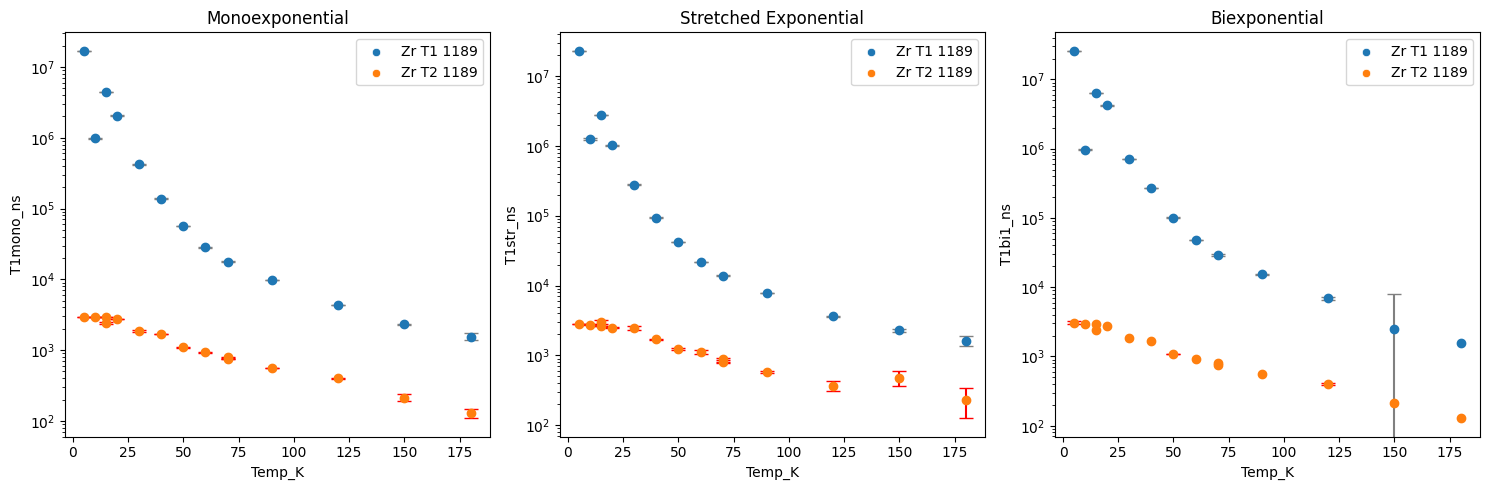

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1189
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1mono_ns'], ax=axes[0], label='Zr T1 1189')
line1_2=sns.scatterplot(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmmono_ns'], ax=axes[0], label='Zr T2 1189')
stdt1m=2*datat1Zr_1189['std1']

axes[0].errorbar(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1mono_ns'], yerr=stdt1m, fmt='o', capsize=5, ecolor='gray')
stdt2m=2*datat2Zr_1189['std1']

lower_bounds2m=datat2Zr_1189['Tmmono_ns']+s2m
upper_bounds2m=datat2Zr_1189['Tmmono_ns']+s2m2
axes[0].errorbar(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmmono_ns'], yerr=stdt2m, fmt='o', capsize=5, ecolor='red')


line2_1=sns.scatterplot(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1str_ns'], ax=axes[1], label='Zr T1 1189')
line2_2=sns.scatterplot(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmstr_ns'], ax=axes[1], label='Zr T2 1189')

stdt1st=2*datat1Zr_1189['stdstr']


axes[1].errorbar(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1str_ns'], yerr=stdt1st, fmt='o', capsize=5, ecolor='gray')
stdt2st=2*datat2Zr_1189['stdstr']

axes[1].errorbar(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmstr_ns'], yerr=stdt2st, fmt='o', capsize=5, ecolor='red')


line3_1=sns.scatterplot(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1bi1_ns'], ax=axes[2], label='Zr T1 1189')
line3_2=sns.scatterplot(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmbi1_ns'], ax=axes[2], label='Zr T2 1189')

stdt1b=2*datat1Zr_1189['stdBi1']
stdt2b=2*datat2Zr_1189['stdBi1']

axes[2].errorbar(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1bi1_ns'], yerr=stdt1b, fmt='o', capsize=5, ecolor='gray')
axes[2].errorbar(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmbi1_ns'], yerr=stdt2b, fmt='o', capsize=5, ecolor='red')

# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1189_Zr_VO.png",bbox_inches='tight')
plt.show()


In [ ]:
datat1Zr_1229= pd.read_excel('/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_VO_Zr_1229.xlsx')
datat1Zr_1229=datat1Zr_1229.sort_values(by='Temp_K')
datat2Zr_1229= pd.read_excel('/content/drive/MyDrive/T1_T2_VO_Zr_Hf/Tm_VO_Zr_1229.xlsx')
datat2Zr_1229=datat2Zr_1229.sort_values(by='Temp_K')

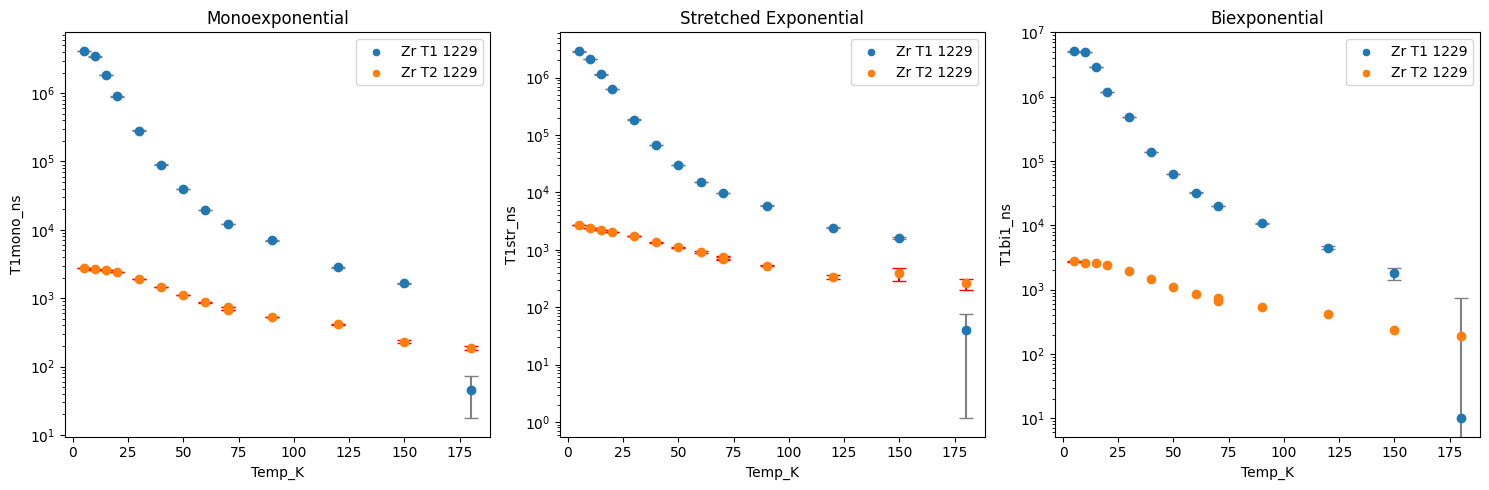

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1229
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Zr_1229['Temp_K'], y=datat1Zr_1229['T1mono_ns'], ax=axes[0], label='Zr T1 1229')
line1_2=sns.scatterplot(x=datat2Zr_1229['Temp_K'], y=datat2Zr_1229['Tmmono_ns'], ax=axes[0], label='Zr T2 1229')
stdt1m=2*datat1Zr_1229['std1']

axes[0].errorbar(x=datat1Zr_1229['Temp_K'], y=datat1Zr_1229['T1mono_ns'], yerr=stdt1m, fmt='o', capsize=5, ecolor='gray')
stdt2m=2*datat2Zr_1229['std1']

axes[0].errorbar(x=datat2Zr_1229['Temp_K'], y=datat2Zr_1229['Tmmono_ns'], yerr=stdt2m, fmt='o', capsize=5, ecolor='red')


line2_1=sns.scatterplot(x=datat1Zr_1229['Temp_K'], y=datat1Zr_1229['T1str_ns'], ax=axes[1], label='Zr T1 1229')
line2_2=sns.scatterplot(x=datat2Zr_1229['Temp_K'], y=datat2Zr_1229['Tmstr_ns'], ax=axes[1], label='Zr T2 1229')

stdt1st=2*datat1Zr_1229['stdstr']


axes[1].errorbar(x=datat1Zr_1229['Temp_K'], y=datat1Zr_1229['T1str_ns'], yerr=stdt1st, fmt='o', capsize=5, ecolor='gray')
stdt2st=2*datat2Zr_1229['stdstr']

axes[1].errorbar(x=datat2Zr_1229['Temp_K'], y=datat2Zr_1229['Tmstr_ns'], yerr=stdt2st, fmt='o', capsize=5, ecolor='red')


line3_1=sns.scatterplot(x=datat1Zr_1229['Temp_K'], y=datat1Zr_1229['T1bi1_ns'], ax=axes[2], label='Zr T1 1229')
line3_2=sns.scatterplot(x=datat2Zr_1229['Temp_K'], y=datat2Zr_1229['Tmbi1_ns'], ax=axes[2], label='Zr T2 1229')

stdt1b=2*datat1Zr_1229['stdBi1']
stdt2b=2*datat2Zr_1229['stdBi1']

axes[2].errorbar(x=datat1Zr_1229['Temp_K'], y=datat1Zr_1229['T1bi1_ns'], yerr=stdt1b, fmt='o', capsize=5, ecolor='gray')
axes[2].errorbar(x=datat2Zr_1229['Temp_K'], y=datat2Zr_1229['Tmbi1_ns'], yerr=stdt2b, fmt='o', capsize=5, ecolor='red')

# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1229_Zr_VO.png")
plt.show()

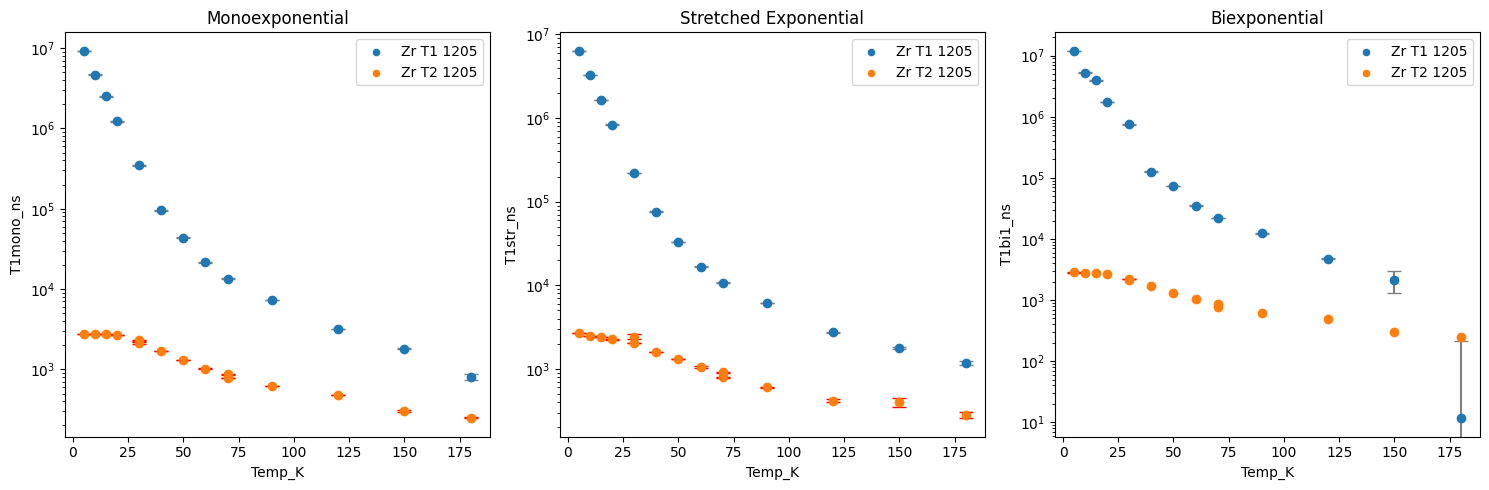

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1205
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Zr_1205['Temp_K'], y=datat1Zr_1205['T1mono_ns'], ax=axes[0], label='Zr T1 1205')
line1_2=sns.scatterplot(x=datat2Zr_1205['Temp_K'], y=datat2Zr_1205['Tmmono_ns'], ax=axes[0], label='Zr T2 1205')
stdt1m=2*datat1Zr_1205['std1']

axes[0].errorbar(x=datat1Zr_1205['Temp_K'], y=datat1Zr_1205['T1mono_ns'], yerr=stdt1m, fmt='o', capsize=5, ecolor='gray')
stdt2m=2*datat2Zr_1205['std1']

axes[0].errorbar(x=datat2Zr_1205['Temp_K'], y=datat2Zr_1205['Tmmono_ns'], yerr=stdt2m, fmt='o', capsize=5, ecolor='red')


line2_1=sns.scatterplot(x=datat1Zr_1205['Temp_K'], y=datat1Zr_1205['T1str_ns'], ax=axes[1], label='Zr T1 1205')
line2_2=sns.scatterplot(x=datat2Zr_1205['Temp_K'], y=datat2Zr_1205['Tmstr_ns'], ax=axes[1], label='Zr T2 1205')

stdt1st=2*datat1Zr_1205['stdstr']


axes[1].errorbar(x=datat1Zr_1205['Temp_K'], y=datat1Zr_1205['T1str_ns'], yerr=stdt1st, fmt='o', capsize=5, ecolor='gray')
stdt2st=2*datat2Zr_1205['stdstr']

axes[1].errorbar(x=datat2Zr_1205['Temp_K'], y=datat2Zr_1205['Tmstr_ns'], yerr=stdt2st, fmt='o', capsize=5, ecolor='red')


line3_1=sns.scatterplot(x=datat1Zr_1205['Temp_K'], y=datat1Zr_1205['T1bi1_ns'], ax=axes[2], label='Zr T1 1205')
line3_2=sns.scatterplot(x=datat2Zr_1205['Temp_K'], y=datat2Zr_1205['Tmbi1_ns'], ax=axes[2], label='Zr T2 1205')

stdt1b=2*datat1Zr_1205['stdBi1']
stdt2b=2*datat2Zr_1205['stdBi1']

axes[2].errorbar(x=datat1Zr_1205['Temp_K'], y=datat1Zr_1205['T1bi1_ns'], yerr=stdt1b, fmt='o', capsize=5, ecolor='gray')
axes[2].errorbar(x=datat2Zr_1205['Temp_K'], y=datat2Zr_1205['Tmbi1_ns'], yerr=stdt2b, fmt='o', capsize=5, ecolor='red')

# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1205_Zr_VO.png")
plt.show()

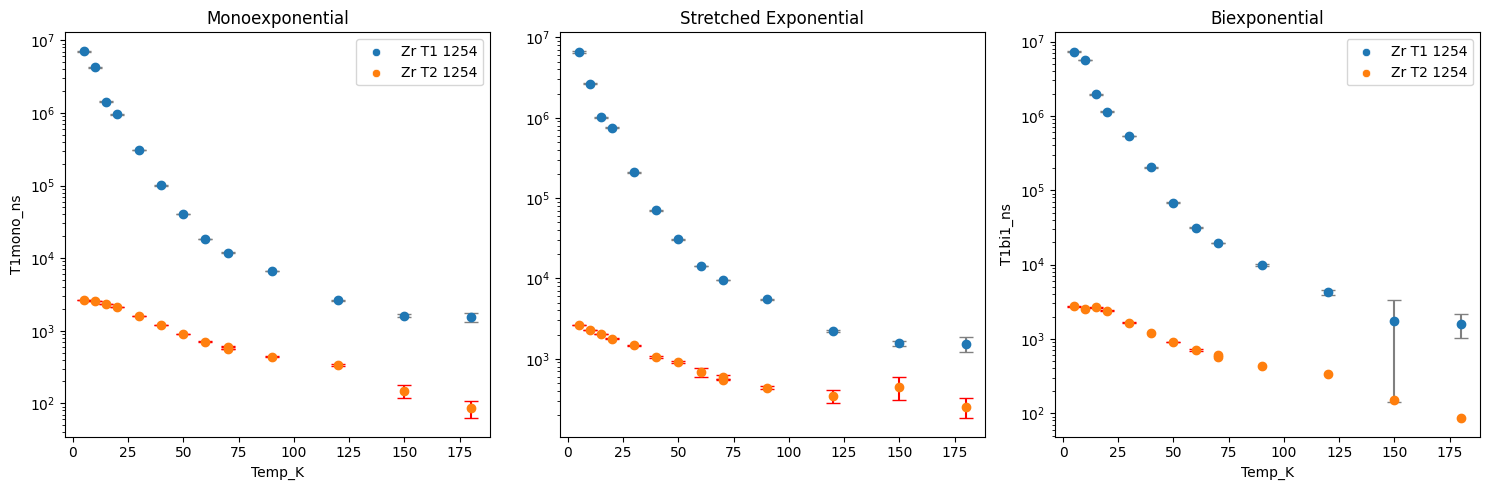

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1254
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Zr_1254['Temp_K'], y=datat1Zr_1254['T1mono_ns'], ax=axes[0], label='Zr T1 1254')
line1_2=sns.scatterplot(x=datat2Zr_1254['Temp_K'], y=datat2Zr_1254['Tmmono_ns'], ax=axes[0], label='Zr T2 1254')
stdt1m=2*datat1Zr_1254['std1']

axes[0].errorbar(x=datat1Zr_1254['Temp_K'], y=datat1Zr_1254['T1mono_ns'], yerr=stdt1m, fmt='o', capsize=5, ecolor='gray')
stdt2m=2*datat2Zr_1254['std1']

axes[0].errorbar(x=datat2Zr_1254['Temp_K'], y=datat2Zr_1254['Tmmono_ns'], yerr=stdt2m, fmt='o', capsize=5, ecolor='red')


line2_1=sns.scatterplot(x=datat1Zr_1205['Temp_K'], y=datat1Zr_1254['T1str_ns'], ax=axes[1], label='Zr T1 1254')
line2_2=sns.scatterplot(x=datat2Zr_1205['Temp_K'], y=datat2Zr_1254['Tmstr_ns'], ax=axes[1], label='Zr T2 1254')

stdt1st=2*datat1Zr_1254['stdstr']


axes[1].errorbar(x=datat1Zr_1254['Temp_K'], y=datat1Zr_1254['T1str_ns'], yerr=stdt1st, fmt='o', capsize=5, ecolor='gray')
stdt2st=2*datat2Zr_1254['stdstr']

axes[1].errorbar(x=datat2Zr_1254['Temp_K'], y=datat2Zr_1254['Tmstr_ns'], yerr=stdt2st, fmt='o', capsize=5, ecolor='red')


line3_1=sns.scatterplot(x=datat1Zr_1254['Temp_K'], y=datat1Zr_1254['T1bi1_ns'], ax=axes[2], label='Zr T1 1254')
line3_2=sns.scatterplot(x=datat2Zr_1254['Temp_K'], y=datat2Zr_1254['Tmbi1_ns'], ax=axes[2], label='Zr T2 1254')

stdt1b=2*datat1Zr_1254['stdBi1']
stdt2b=2*datat2Zr_1254['stdBi1']

axes[2].errorbar(x=datat1Zr_1254['Temp_K'], y=datat1Zr_1254['T1bi1_ns'], yerr=stdt1b, fmt='o', capsize=5, ecolor='gray')
axes[2].errorbar(x=datat2Zr_1254['Temp_K'], y=datat2Zr_1254['Tmbi1_ns'], yerr=stdt2b, fmt='o', capsize=5, ecolor='red')

# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1254_Zr_VO.png")
plt.show()

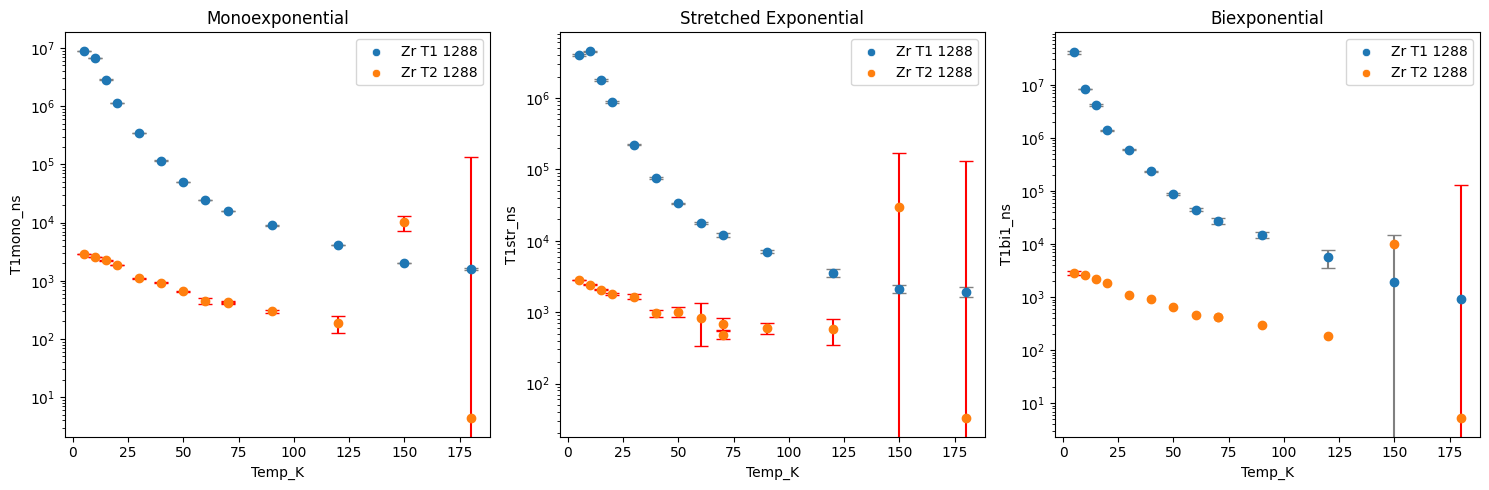

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1288
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Zr_1288['Temp_K'], y=datat1Zr_1288['T1mono_ns'], ax=axes[0], label='Zr T1 1288')
line1_2=sns.scatterplot(x=datat2Zr_1288['Temp_K'], y=datat2Zr_1288['Tmmono_ns'], ax=axes[0], label='Zr T2 1288')
stdt1m=2*datat1Zr_1205['std1']

axes[0].errorbar(x=datat1Zr_1288['Temp_K'], y=datat1Zr_1288['T1mono_ns'], yerr=stdt1m, fmt='o', capsize=5, ecolor='gray')
stdt2m=2*datat2Zr_1288['std1']

axes[0].errorbar(x=datat2Zr_1288['Temp_K'], y=datat2Zr_1288['Tmmono_ns'], yerr=stdt2m, fmt='o', capsize=5, ecolor='red')


line2_1=sns.scatterplot(x=datat1Zr_1288['Temp_K'], y=datat1Zr_1288['T1str_ns'], ax=axes[1], label='Zr T1 1288')
line2_2=sns.scatterplot(x=datat2Zr_1288['Temp_K'], y=datat2Zr_1288['Tmstr_ns'], ax=axes[1], label='Zr T2 1288')

stdt1st=2*datat1Zr_1288['stdstr']


axes[1].errorbar(x=datat1Zr_1288['Temp_K'], y=datat1Zr_1288['T1str_ns'], yerr=stdt1st, fmt='o', capsize=5, ecolor='gray')
stdt2st=2*datat2Zr_1288['stdstr']

axes[1].errorbar(x=datat2Zr_1288['Temp_K'], y=datat2Zr_1288['Tmstr_ns'], yerr=stdt2st, fmt='o', capsize=5, ecolor='red')


line3_1=sns.scatterplot(x=datat1Zr_1288['Temp_K'], y=datat1Zr_1288['T1bi1_ns'], ax=axes[2], label='Zr T1 1288')
line3_2=sns.scatterplot(x=datat2Zr_1288['Temp_K'], y=datat2Zr_1288['Tmbi1_ns'], ax=axes[2], label='Zr T2 1288')

stdt1b=2*datat1Zr_1288['stdBi1']
stdt2b=2*datat2Zr_1288['stdBi1']

axes[2].errorbar(x=datat1Zr_1288['Temp_K'], y=datat1Zr_1288['T1bi1_ns'], yerr=stdt1b, fmt='o', capsize=5, ecolor='gray')
axes[2].errorbar(x=datat2Zr_1288['Temp_K'], y=datat2Zr_1288['Tmbi1_ns'], yerr=stdt2b, fmt='o', capsize=5, ecolor='red')

# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1288_Zr_VO.png")
plt.show()

**Plotting Hf VO**

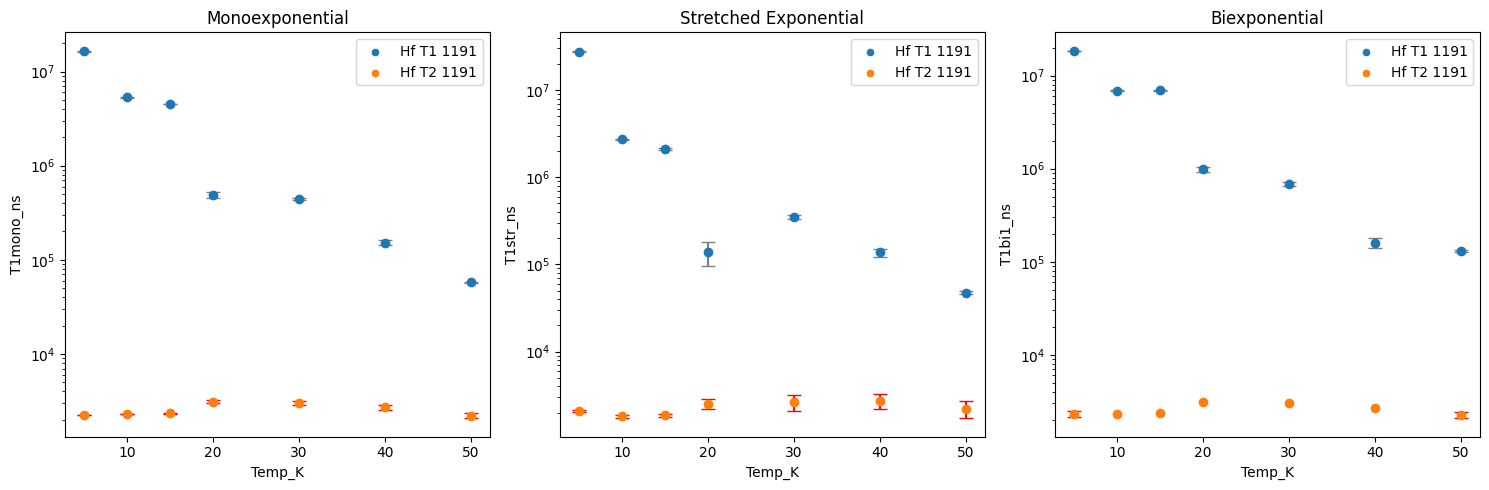

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1191
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1mono_ns'], ax=axes[0], label='Hf T1 1191')
line1_2=sns.scatterplot(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmmono_ns'], ax=axes[0], label='Hf T2 1191')
stdt1m=2*datat1Hf_1191['std1']

axes[0].errorbar(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1mono_ns'], yerr=stdt1m, fmt='o', capsize=5, ecolor='gray')
stdt2m=2*datat2Hf_1191['std1']

axes[0].errorbar(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmmono_ns'], yerr=stdt2m, fmt='o', capsize=5, ecolor='red')


line2_1=sns.scatterplot(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1str_ns'], ax=axes[1], label='Hf T1 1191')
line2_2=sns.scatterplot(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmstr_ns'], ax=axes[1], label='Hf T2 1191')

stdt1st=2*datat1Hf_1191['stdstr']


axes[1].errorbar(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1str_ns'], yerr=stdt1st, fmt='o', capsize=5, ecolor='gray')
stdt2st=2*datat2Hf_1191['stdstr']

axes[1].errorbar(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmstr_ns'], yerr=stdt2st, fmt='o', capsize=5, ecolor='red')


line3_1=sns.scatterplot(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1bi1_ns'], ax=axes[2], label='Hf T1 1191')
line3_2=sns.scatterplot(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmbi1_ns'], ax=axes[2], label='Hf T2 1191')

stdt1b=2*datat1Hf_1191['stdBi1']
stdt2b=2*datat2Hf_1191['stdBi1']

axes[2].errorbar(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1bi1_ns'], yerr=stdt1b, fmt='o', capsize=5, ecolor='gray')
axes[2].errorbar(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmbi1_ns'], yerr=stdt2b, fmt='o', capsize=5, ecolor='red')

# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1191_Hf_VO.png")
plt.show()

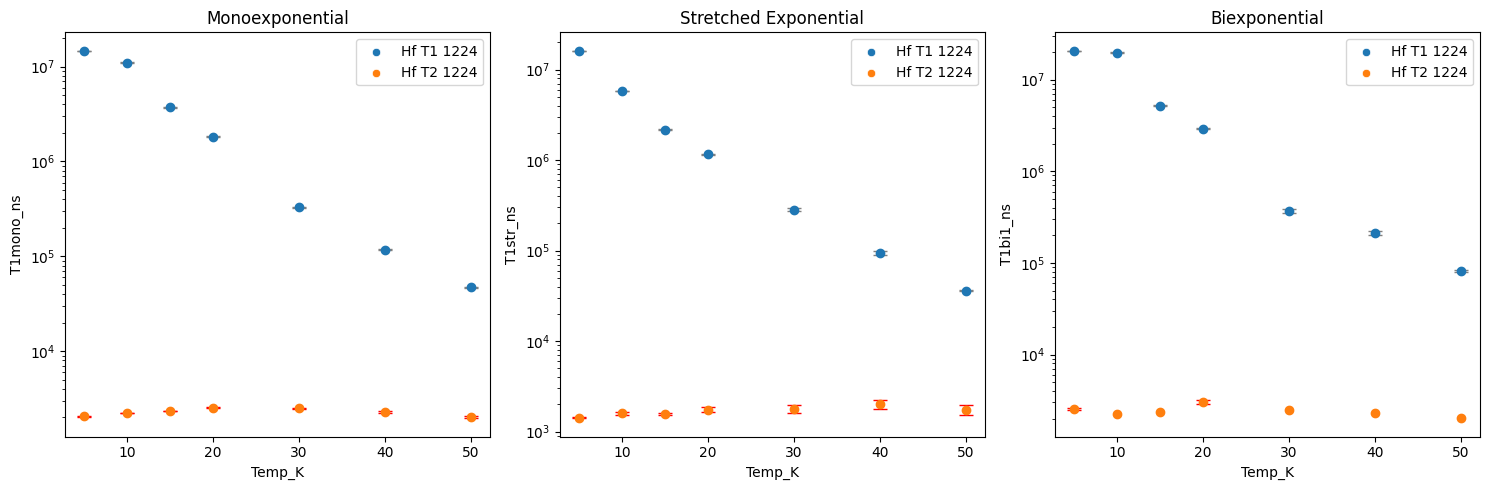

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1224
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Hf_1224['Temp_K'], y=datat1Hf_1224['T1mono_ns'], ax=axes[0], label='Hf T1 1224')
line1_2=sns.scatterplot(x=datat2Hf_1224['Temp_K'], y=datat2Hf_1224['Tmmono_ns'], ax=axes[0], label='Hf T2 1224')
stdt1m=2*datat1Hf_1224['std1']

axes[0].errorbar(x=datat1Hf_1224['Temp_K'], y=datat1Hf_1224['T1mono_ns'], yerr=stdt1m, fmt='o', capsize=5, ecolor='gray')
stdt2m=2*datat2Hf_1224['std1']

axes[0].errorbar(x=datat2Hf_1224['Temp_K'], y=datat2Hf_1224['Tmmono_ns'], yerr=stdt2m, fmt='o', capsize=5, ecolor='red')


line2_1=sns.scatterplot(x=datat1Hf_1224['Temp_K'], y=datat1Hf_1224['T1str_ns'], ax=axes[1], label='Hf T1 1224')
line2_2=sns.scatterplot(x=datat2Hf_1224['Temp_K'], y=datat2Hf_1224['Tmstr_ns'], ax=axes[1], label='Hf T2 1224')

stdt1st=2*datat1Hf_1224['stdstr']


axes[1].errorbar(x=datat1Hf_1224['Temp_K'], y=datat1Hf_1224['T1str_ns'], yerr=stdt1st, fmt='o', capsize=5, ecolor='gray')
stdt2st=2*datat2Hf_1224['stdstr']

axes[1].errorbar(x=datat2Hf_1224['Temp_K'], y=datat2Hf_1224['Tmstr_ns'], yerr=stdt2st, fmt='o', capsize=5, ecolor='red')


line3_1=sns.scatterplot(x=datat1Hf_1224['Temp_K'], y=datat1Hf_1224['T1bi1_ns'], ax=axes[2], label='Hf T1 1224')
line3_2=sns.scatterplot(x=datat2Hf_1224['Temp_K'], y=datat2Hf_1224['Tmbi1_ns'], ax=axes[2], label='Hf T2 1224')

stdt1b=2*datat1Hf_1224['stdBi1']
stdt2b=2*datat2Hf_1224['stdBi1']

axes[2].errorbar(x=datat1Hf_1224['Temp_K'], y=datat1Hf_1224['T1bi1_ns'], yerr=stdt1b, fmt='o', capsize=5, ecolor='gray')
axes[2].errorbar(x=datat2Hf_1224['Temp_K'], y=datat2Hf_1224['Tmbi1_ns'], yerr=stdt2b, fmt='o', capsize=5, ecolor='red')

# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1224_Hf_VO.png")
plt.show()

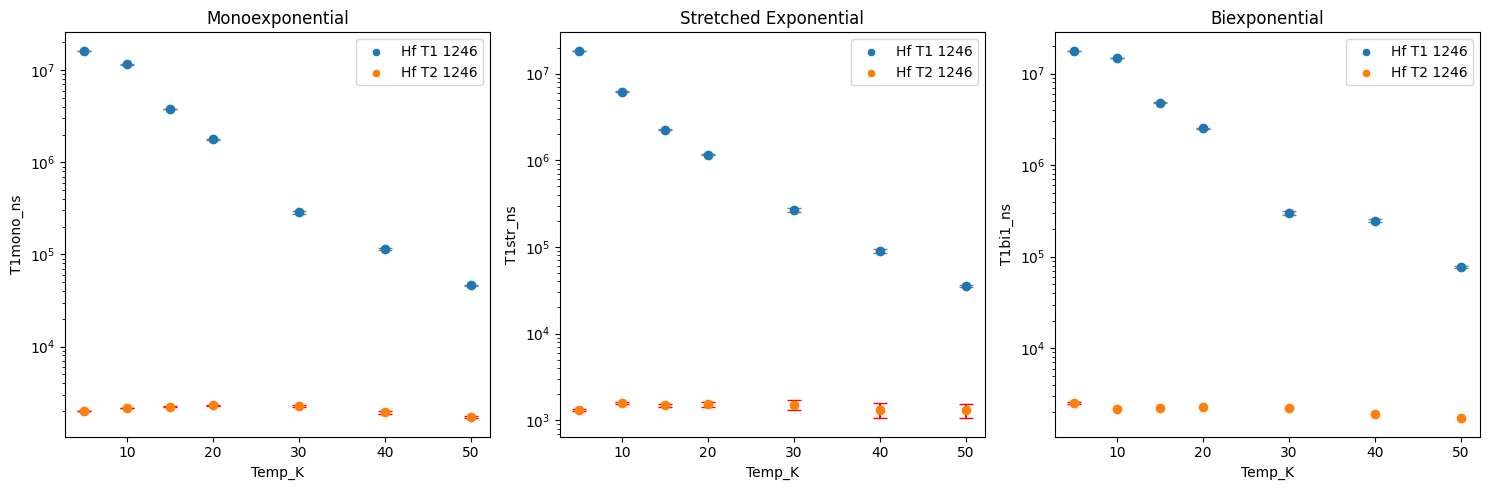

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1246
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Hf_1246['Temp_K'], y=datat1Hf_1246['T1mono_ns'], ax=axes[0], label='Hf T1 1246')
line1_2=sns.scatterplot(x=datat2Hf_1246['Temp_K'], y=datat2Hf_1246['Tmmono_ns'], ax=axes[0], label='Hf T2 1246')
stdt1m=2*datat1Hf_1246['std1']

axes[0].errorbar(x=datat1Hf_1246['Temp_K'], y=datat1Hf_1246['T1mono_ns'], yerr=stdt1m, fmt='o', capsize=5, ecolor='gray')
stdt2m=2*datat2Hf_1246['std1']

axes[0].errorbar(x=datat2Hf_1246['Temp_K'], y=datat2Hf_1246['Tmmono_ns'], yerr=stdt2m, fmt='o', capsize=5, ecolor='red')


line2_1=sns.scatterplot(x=datat1Hf_1246['Temp_K'], y=datat1Hf_1246['T1str_ns'], ax=axes[1], label='Hf T1 1246')
line2_2=sns.scatterplot(x=datat2Hf_1246['Temp_K'], y=datat2Hf_1246['Tmstr_ns'], ax=axes[1], label='Hf T2 1246')

stdt1st=2*datat1Hf_1246['stdstr']


axes[1].errorbar(x=datat1Hf_1246['Temp_K'], y=datat1Hf_1246['T1str_ns'], yerr=stdt1st, fmt='o', capsize=5, ecolor='gray')
stdt2st=2*datat2Hf_1246['stdstr']

axes[1].errorbar(x=datat2Hf_1246['Temp_K'], y=datat2Hf_1246['Tmstr_ns'], yerr=stdt2st, fmt='o', capsize=5, ecolor='red')


line3_1=sns.scatterplot(x=datat1Hf_1246['Temp_K'], y=datat1Hf_1246['T1bi1_ns'], ax=axes[2], label='Hf T1 1246')
line3_2=sns.scatterplot(x=datat2Hf_1246['Temp_K'], y=datat2Hf_1246['Tmbi1_ns'], ax=axes[2], label='Hf T2 1246')

stdt1b=2*datat1Hf_1246['stdBi1']
stdt2b=2*datat2Hf_1246['stdBi1']

axes[2].errorbar(x=datat1Hf_1246['Temp_K'], y=datat1Hf_1246['T1bi1_ns'], yerr=stdt1b, fmt='o', capsize=5, ecolor='gray')
axes[2].errorbar(x=datat2Hf_1246['Temp_K'], y=datat2Hf_1246['Tmbi1_ns'], yerr=stdt2b, fmt='o', capsize=5, ecolor='red')

# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1246_Hf_VO.png")

plt.show()

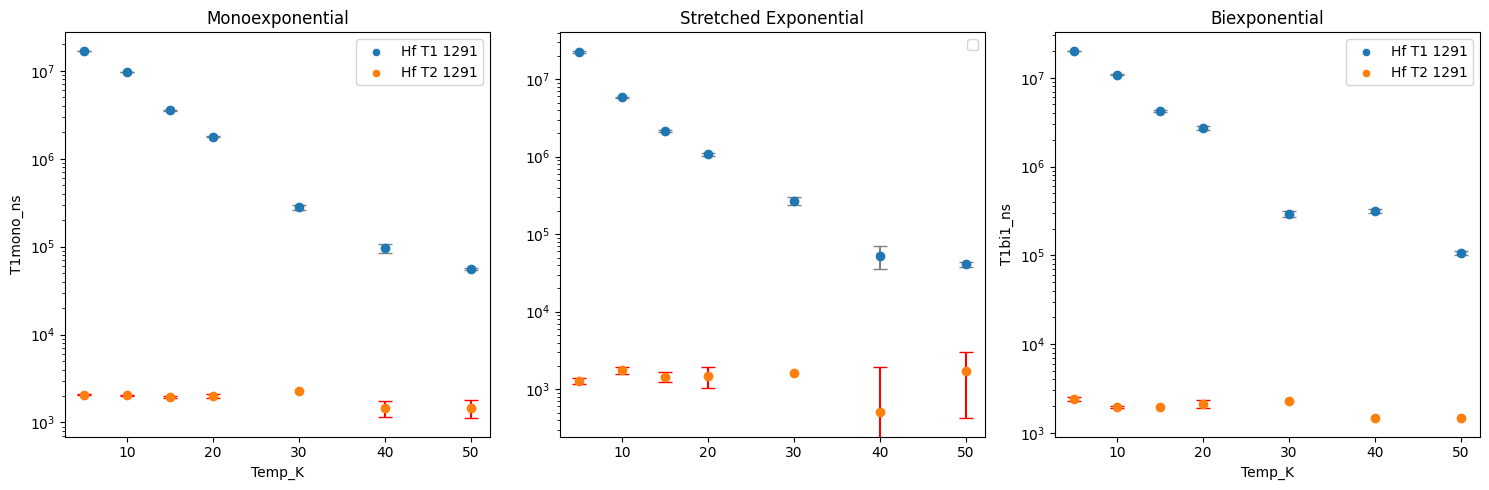

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1291
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Hf_1291['Temp_K'], y=datat1Hf_1291['T1mono_ns'], ax=axes[0], label='Hf T1 1291')
line1_2=sns.scatterplot(x=datat2Hf_1291['Temp_K'], y=datat2Hf_1291['Tmmono_ns'], ax=axes[0], label='Hf T2 1291')
stdt1m=2*datat1Hf_1291['std1']

axes[0].errorbar(x=datat1Hf_1291['Temp_K'], y=datat1Hf_1291['T1mono_ns'], yerr=stdt1m, fmt='o', capsize=5, ecolor='gray')
stdt2m=2*datat2Hf_1291['std1']

axes[0].errorbar(x=datat2Hf_1291['Temp_K'], y=datat2Hf_1291['Tmmono_ns'], yerr=stdt2m, fmt='o', capsize=5, ecolor='red')


line2_1=sns.scatterplot(x=datat1Hf_1291['Temp_K'], y=datat1Hf_1246['T1str_ns'], ax=axes[1], label='Hf T1 1291')
line2_2=sns.scatterplot(x=datat2Hf_1291['Temp_K'], y=datat2Hf_1246['Tmstr_ns'], ax=axes[1], label='Hf T2 1291')

stdt1st=2*datat1Hf_1291['stdstr']


axes[1].errorbar(x=datat1Hf_1291['Temp_K'], y=datat1Hf_1291['T1str_ns'], yerr=stdt1st, fmt='o', capsize=5, ecolor='gray')
stdt2st=2*datat2Hf_1291['stdstr']

axes[1].errorbar(x=datat2Hf_1291['Temp_K'], y=datat2Hf_1291['Tmstr_ns'], yerr=stdt2st, fmt='o', capsize=5, ecolor='red')


line3_1=sns.scatterplot(x=datat1Hf_1291['Temp_K'], y=datat1Hf_1291['T1bi1_ns'], ax=axes[2], label='Hf T1 1291')
line3_2=sns.scatterplot(x=datat2Hf_1291['Temp_K'], y=datat2Hf_1291['Tmbi1_ns'], ax=axes[2], label='Hf T2 1291')

stdt1b=2*datat1Hf_1291['stdBi1']
stdt2b=2*datat2Hf_1291['stdBi1']

axes[2].errorbar(x=datat1Hf_1291['Temp_K'], y=datat1Hf_1291['T1bi1_ns'], yerr=stdt1b, fmt='o', capsize=5, ecolor='gray')
axes[2].errorbar(x=datat2Hf_1291['Temp_K'], y=datat2Hf_1291['Tmbi1_ns'], yerr=stdt2b, fmt='o', capsize=5, ecolor='red')

# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1291_Hf_VO.png")

plt.show()

**Hf_Zr_OP1**

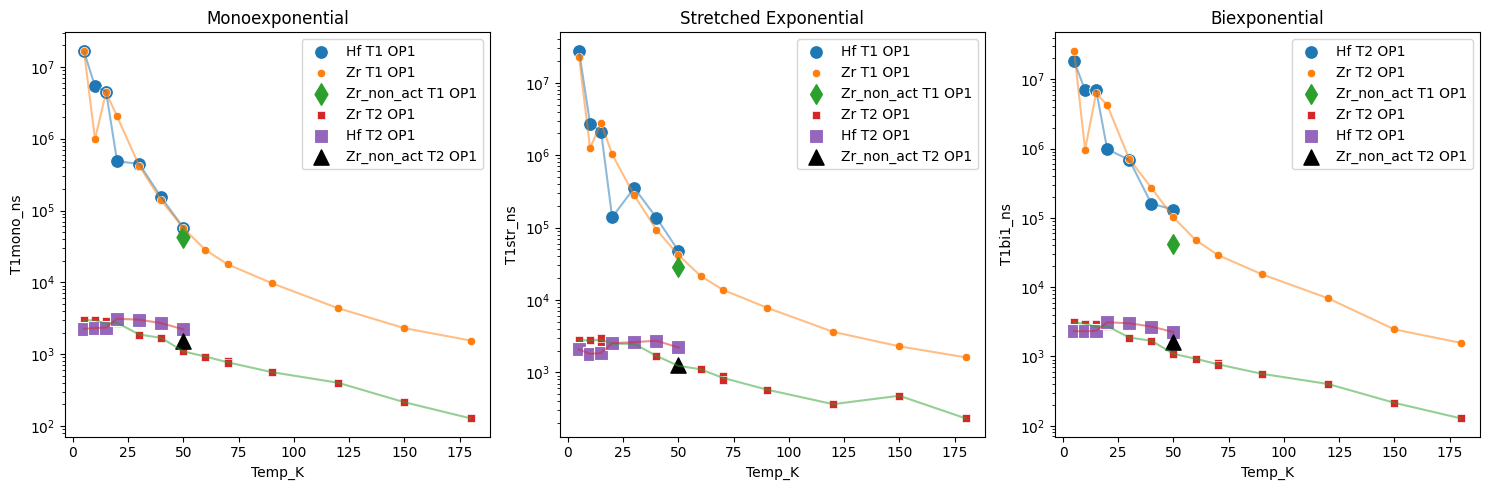

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# (1191 Hf) (1189 Zr)
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1mono_ns'], ax=axes[0], s =100, label='Hf T1 OP1')
line1_11=sns.lineplot(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1mono_ns'], ax=axes[0],alpha=0.5)

line1_=sns.scatterplot(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1mono_ns'], ax=axes[0], label='Zr T1 OP1')
line1_0=sns.lineplot(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1mono_ns'], ax=axes[0],alpha=0.5)

axes[0].scatter(x=50.0, y=43337.0, marker='d', s=120, label='Zr_non_act T1 OP1')


line1_2=sns.scatterplot(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmmono_ns'], ax=axes[0], marker='s', label='Zr T2 OP1')
line1_21=sns.lineplot(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmmono_ns'], ax=axes[0],alpha=0.5)

line1_2=sns.scatterplot(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmmono_ns'], ax=axes[0], marker='s', s =100, label='Hf T2 OP1')
line1_21=sns.lineplot(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmmono_ns'], ax=axes[0],alpha=0.5)

axes[0].scatter(x=50.0, y=1507.0, marker='^', s=120,c='black', label='Zr_non_act T2 OP1')


##

line2_1=sns.scatterplot(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1str_ns'], ax=axes[1], s =100, label='Hf T1 OP1')
line2_1=sns.lineplot(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1str_ns'], ax=axes[1],alpha=0.5)

line2_1=sns.scatterplot(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1str_ns'], ax=axes[1], label='Zr T1 OP1')
line2_1=sns.lineplot(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1str_ns'], ax=axes[1],alpha=0.5)

axes[1].scatter(x=50.0, y=28330.0, marker='d', s=100, label='Zr_non_act T1 OP1')

line2_2=sns.scatterplot(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmstr_ns'], ax=axes[1], marker='s', label='Zr T2 OP1')
line2_1=sns.lineplot(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmstr_ns'], ax=axes[1],alpha=0.5)

line2_2=sns.scatterplot(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmstr_ns'], ax=axes[1], marker='s', s =100, label='Hf T2 OP1')
line2_1=sns.lineplot(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmstr_ns'], ax=axes[1],alpha=0.5)

axes[1].scatter(x=50.0, y=1256.0, marker='^', s=120,c='black', label='Zr_non_act T2 OP1')

##

line3_1=sns.scatterplot(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1bi1_ns'], ax=axes[2], s =100, label='Hf T2 OP1')
line3_1=sns.lineplot(x=datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1bi1_ns'], ax=axes[2], alpha=0.5)

line3_1=sns.scatterplot(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1bi1_ns'], ax=axes[2], label='Zr T2 OP1')
line3_1=sns.lineplot(x=datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1bi1_ns'], ax=axes[2], alpha=0.5)

axes[2].scatter(x=50.0, y=41854.0, marker='d', s=100, label='Zr_non_act T1 OP1')

line3_2=sns.scatterplot(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmbi1_ns'], ax=axes[2],marker='s', label='Zr T2 OP1')
line3_2=sns.lineplot(x=datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmbi1_ns'], ax=axes[2], alpha=0.5)

line3_2=sns.scatterplot(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmbi1_ns'], ax=axes[2],marker='s', s =100, label='Hf T2 OP1')
line3_2=sns.lineplot(x=datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmbi1_ns'], ax=axes[2], alpha=0.5)

axes[2].scatter(x=50.0, y=1616.0, marker='^', s=120, c='black', label='Zr_non_act T2 OP1')


# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1191_Hf_1189_Zr_VO.png")
plt.show()

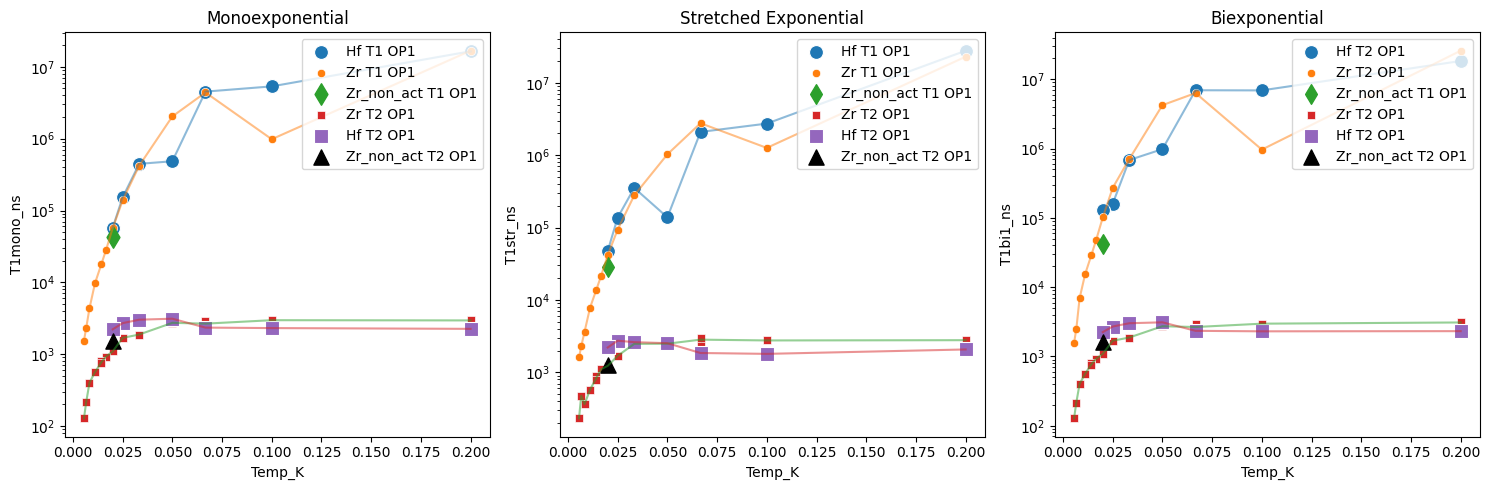

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# (1191 Hf) (1189 Zr)
# Create a figure and an array of subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
line1_1=sns.scatterplot(x=1/datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1mono_ns'], ax=axes[0], s =100, label='Hf T1 OP1')
line1_11=sns.lineplot(x=1/datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1mono_ns'], ax=axes[0],alpha=0.5)

line1_=sns.scatterplot(x=1/datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1mono_ns'], ax=axes[0], label='Zr T1 OP1')
line1_0=sns.lineplot(x=1/datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1mono_ns'], ax=axes[0],alpha=0.5)

axes[0].scatter(x=1/50.0, y=43337.0, marker='d', s=120, label='Zr_non_act T1 OP1')


line1_2=sns.scatterplot(x=1/datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmmono_ns'], ax=axes[0], marker='s', label='Zr T2 OP1')
line1_21=sns.lineplot(x=1/datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmmono_ns'], ax=axes[0],alpha=0.5)

line1_2=sns.scatterplot(x=1/datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmmono_ns'], ax=axes[0], marker='s', s =100, label='Hf T2 OP1')
line1_21=sns.lineplot(x=1/datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmmono_ns'], ax=axes[0],alpha=0.5)

axes[0].scatter(x=1/50.0, y=1507.0, marker='^', s=120,c='black', label='Zr_non_act T2 OP1')


##

line2_1=sns.scatterplot(x=1/datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1str_ns'], ax=axes[1], s =100, label='Hf T1 OP1')
line2_1=sns.lineplot(x=1/datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1str_ns'], ax=axes[1],alpha=0.5)

line2_1=sns.scatterplot(x=1/datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1str_ns'], ax=axes[1], label='Zr T1 OP1')
line2_1=sns.lineplot(x=1/datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1str_ns'], ax=axes[1],alpha=0.5)

axes[1].scatter(x=1/50.0, y=28330.0, marker='d', s=100, label='Zr_non_act T1 OP1')

line2_2=sns.scatterplot(x=1/datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmstr_ns'], ax=axes[1], marker='s', label='Zr T2 OP1')
line2_1=sns.lineplot(x=1/datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmstr_ns'], ax=axes[1],alpha=0.5)

line2_2=sns.scatterplot(x=1/datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmstr_ns'], ax=axes[1], marker='s', s =100, label='Hf T2 OP1')
line2_1=sns.lineplot(x=1/datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmstr_ns'], ax=axes[1],alpha=0.5)

axes[1].scatter(x=1/50.0, y=1256.0, marker='^', s=120,c='black', label='Zr_non_act T2 OP1')

##

line3_1=sns.scatterplot(x=1/datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1bi1_ns'], ax=axes[2], s =100, label='Hf T2 OP1')
line3_1=sns.lineplot(x=1/datat1Hf_1191['Temp_K'], y=datat1Hf_1191['T1bi1_ns'], ax=axes[2], alpha=0.5)

line3_1=sns.scatterplot(x=1/datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1bi1_ns'], ax=axes[2], label='Zr T2 OP1')
line3_1=sns.lineplot(x=1/datat1Zr_1189['Temp_K'], y=datat1Zr_1189['T1bi1_ns'], ax=axes[2], alpha=0.5)

axes[2].scatter(x=1/50.0, y=41854.0, marker='d', s=100, label='Zr_non_act T1 OP1')

line3_2=sns.scatterplot(x=1/datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmbi1_ns'], ax=axes[2],marker='s', label='Zr T2 OP1')
line3_2=sns.lineplot(x=1/datat2Zr_1189['Temp_K'], y=datat2Zr_1189['Tmbi1_ns'], ax=axes[2], alpha=0.5)

line3_2=sns.scatterplot(x=1/datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmbi1_ns'], ax=axes[2],marker='s', s =100, label='Hf T2 OP1')
line3_2=sns.lineplot(x=1/datat2Hf_1191['Temp_K'], y=datat2Hf_1191['Tmbi1_ns'], ax=axes[2], alpha=0.5)

axes[2].scatter(x=1/50.0, y=1616.0, marker='^', s=120, c='black', label='Zr_non_act T2 OP1')


# Customize the plots (if needed)
axes[0].set_title("Monoexponential")
axes[1].set_title("Stretched Exponential")
axes[2].set_title("Biexponential")

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

#axes[0].set_xscale('log')
#axes[1].set_xscale('log')
#axes[2].set_xscale('log')


axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')


# Add labels, titles, etc. as needed

# Display the figure
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/T1_T2_VO_Zr_Hf/T1_T2_1191_Hf_1189_Zr_VO_invTemp.png")
plt.show()